In [1]:
import numpy as np
import pandas as pd

from py.plots.plotting import plotDiscreteMap, plotQuadrants, plotTraceDeterminant

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [58]:
df_show = pd.read_csv('default.csv')

/Users/ronja/Documents/GitHub/neural-fields/py/plots/plotting.py:175: UserWarning: No contour levels were found within the data range.
  ax.contour(turings, origin='lower', vmin=0, vmax=1, levels=0, colors='black', linestyles='dashed')
/Users/ronja/Documents/GitHub/neural-fields/py/plots/plotting.py:188: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=xlabels)
/Users/ronja/Documents/GitHub/neural-fields/py/plots/plotting.py:190: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=ylabels)


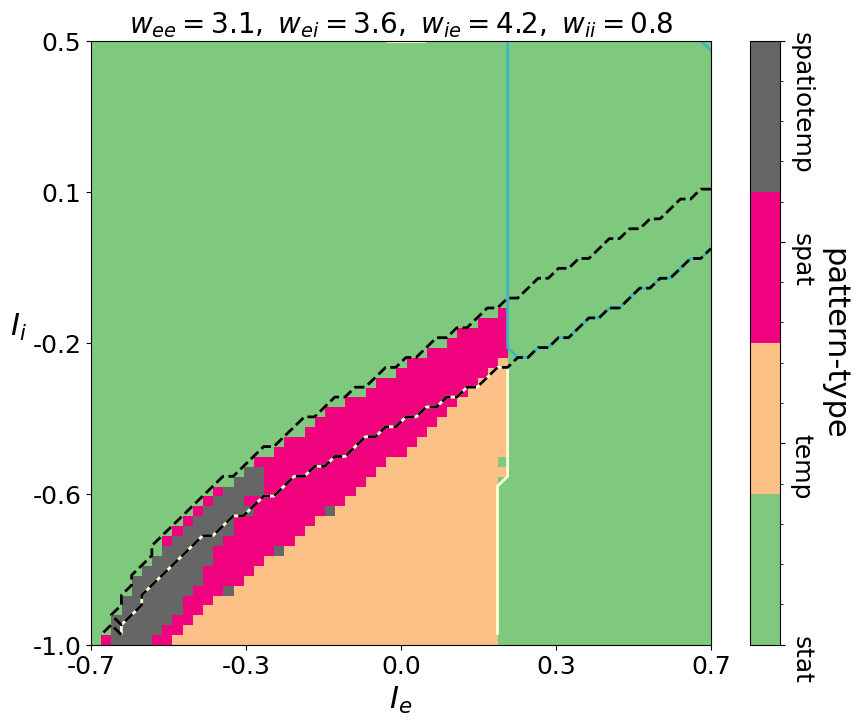

In [59]:
plotDiscreteMap(df_show, title = r'$w_{ee}=3.1,\ w_{ei}=3.6,\ w_{ie}=4.2,\ w_{ii}=0.8$')

In [30]:
df_show[df_show['p_random']==3]

,Unnamed: 0,I_e,I_i,stability,turing,turing_hopf,p_random
35,0,-0.653333,-0.80,0,0,0,3
67,0,-0.606667,-0.75,0,0,0,3
68,0,-0.606667,-0.70,1,1,0,3
99,0,-0.560000,-0.70,0,0,0,3
100,0,-0.560000,-0.65,1,1,0,3
124,0,-0.513333,-1.00,0,0,0,3
131,0,-0.513333,-0.65,0,0,0,3
132,0,-0.513333,-0.60,1,1,0,3
133,0,-0.513333,-0.55,1,1,0,3
155,0,-0.466667,-1.00,1,1,0,3


In [31]:
from py.params import setParams
from py.analysis import computeFPs, checkFixPtsStability, a_jkValues, det, tr

ee = -0.56
ii = -0.5

params={'I_e': ee, 'I_i': ii}
ps = setParams(params)

fps = computeFPs(ps)

stab = checkFixPtsStability(fps, ps)

a_ee, a_ei, a_ie, a_ii = a_jkValues(fps[0], ps)

l=61
k = np.linspace(-2,2,l)
determinant = det(k, a_ee, a_ei, a_ie, a_ii, ps)
trace = tr(k, a_ee, a_ii, ps)
zero = np.zeros(l)

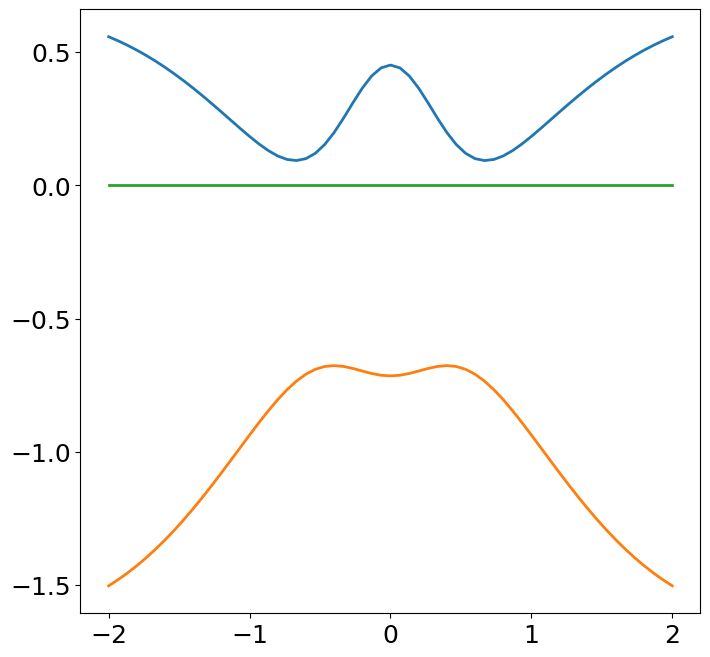

In [32]:
import matplotlib.pyplot as plt

plt.plot(k, determinant, k, trace)
plt.plot(k, zero)